# Statistical Data Analysis Project
# Research on telecom prepaid plans

I work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

My goal is to analyze behavior of 500 Megaline customers from 2018 and determine which plan brings more revenue. 

## Open the data file and study the general information. 

### Read the data file and import the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats as st
%matplotlib inline



try:
    df_internet = pd.read_csv('megaline_internet.csv')
    df_users = pd.read_csv('megaline_users.csv')
    df_calls = pd.read_csv('megaline_calls.csv')
    df_messages = pd.read_csv('megaline_messages.csv')
    df_plans = pd.read_csv('megaline_plans.csv')
except:
    df_internet = pd.read_csv('/datasets/megaline_internet.csv')
    df_users = pd.read_csv('/datasets/megaline_users.csv')
    df_calls = pd.read_csv('/datasets/megaline_calls.csv')
    df_messages = pd.read_csv('/datasets/megaline_messages.csv')
    df_plans = pd.read_csv('/datasets/megaline_plans.csv')

print('Files read successfully')

Files read successfully


### 1. Study the general information:

**Users:**

In [2]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


NaN 'churn_date' values indicate that the calling plan was being used when this data was retrieved. I'll replace NaN values with matching string later.

In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


No missing values (we addressed churn_date situation before). I'll change both date columns data type to datetime type. 

In [4]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


We have 500 rows of user data, no visible outliers in the age column data. We have 500 users, aged 18 through 75, with a mean of 45 and median of 46. 

**Calls:**

In [5]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


No missing values. I'll change call_date data type to datetime. Call duration seconds should be rounded up to a min according to the company policy, so I'll change its data type to int.

In [7]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


There are total of 137735 calls, with a minimum duration of 0 seconds (that we'll round to a minute, according to the company policy), up to 38 minutes. The mean is 7 minutes and median is 6 minutes. No visible duration outliers.

**Possible reason for 0.0 values in 'duration' could be a very short phone call (call to a wrong number, etc), call lasted very short time, not enough time for the system to recored the exact amount of duration seconds.**

**Internet data usage of 0.0 could be a recored of a person that didn't use his data plan at all - probably used wifi constantly / older person who use his cellphone for calls and messages only.**

**Messages:**

In [8]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [9]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


No missing values. I'll change message_date data type to datetime.

In [10]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


There are total of 76051 messages. No visible duration outliers.

**Internet:**

In [11]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [12]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


No missing values. I'll change session_date data type to datetime. For web traffic, individual web sessions are not rounded up from megabytes to gigabytes. Instead, the total for the month is rounded up.

In [13]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


There are total of 104825 internet usage sessions, with a minimum mb_used of 0 mb, up to 1694 mb. The mean is 367 mb and median is 344 mb. No visible mb_used outliers.

**Plans:**

In [14]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [15]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


We can see the two prepaid plans, Surf and Ultimate. Data types and values are correct.

### Conclusion

All the date columns across the board should be changed to datetime type. NaN values in df_users should be filled with a matching string value. Call duration should be rounded up for all calls. I'll need to check for duplicates too.

### 2. Prepare the data:

* **Fill missing values:**

In [16]:
df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')

I filled the NaN values in users 'churn_date' with the date of the latest day in 2018.

**According to the data provider, if the 'churn_date' value is missing, the calling plan was being used when this data was retrieved. Add that to the fact that all of the data is related to 2018 only, we can fill the 'churn_date' with the date of the last day of 2018.**

* **Data types conversion:**

In [17]:
import re
for data in [df_users, df_calls, df_internet, df_messages]:
    if data is not df_users:
        data['id'] = np.vectorize(lambda x: re.sub('.*_',  '' ,   x))(data['id'])       
    for column in ['reg_date' ,'session_date', 'churn_date' ,'call_date' ,'message_date']:
        if column in data.columns:
            data[column] = pd.to_datetime(data[column])

I changed the dates columns to datetime type and separated user_id from the corresponding id value. 

In [18]:
df_calls['duration'] = (df_calls['duration'].apply(np.ceil).astype('int64'))

I rounded up calls duration to minutes and changed the datatype to int. 

* **Check for date mismatches**

I need to check that there are no cases of date mismatches in all of the dataframes.

In [19]:
date_check = df_users.query('churn_date != 2018-12-31')
sum(date_check['reg_date'] > date_check['churn_date'])

0

In [20]:
df_dates_check = df_users.merge(df_messages, how='left').merge(df_calls,how='left').merge(df_internet, how='left')
print(len(df_dates_check[df_dates_check['reg_date'] > df_dates_check['message_date']]))
print(len(df_dates_check[df_dates_check['reg_date'] > df_dates_check['call_date']]))
print(len(df_dates_check[df_dates_check['reg_date'] > df_dates_check['session_date']]))

0
0
0


There are no date mismatches in the dataframes.

* **Check for duplicates:**

In [21]:
for df in [df_users, df_calls, df_messages, df_internet]:
    print(df.duplicated().sum())

0
0
0
0


No duplicate rows. We cam move on.

* **Make necessary calculations**

**The number of calls made and minutes used per month**

In [22]:
df_calls['month'] = df_calls['call_date'].dt.month
calls_made_per_month = df_calls.groupby(["user_id","month"]).agg({"duration": "sum", "id":"count"}).reset_index()
calls_made_per_month.columns = ["user_id","month","total_min_per_month", "total_calls_per_month"]
calls_made_per_month.head()

,user_id,month,total_min_per_month,total_calls_per_month
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64


**The number of text messages sent per month**

In [23]:
df_messages['month'] = df_messages['message_date'].dt.month
messages_sent_per_month = df_messages.groupby(["user_id","month"])["id"].count().reset_index()
messages_sent_per_month.columns = ['user_id','month','messages_sent_per_month']
messages_sent_per_month.head()

,user_id,month,messages_sent_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


**The volume of data per month**

In [24]:
df_internet['month'] = df_internet['session_date'].dt.month
data_vol_per_month = df_internet.groupby(["user_id","month"])["mb_used"].sum().reset_index()
data_vol_per_month.columns = ['user_id', 'month', "data_vol_mb_per_month"]
data_vol_per_month['data_vol_gb_per_month'] = np.ceil((data_vol_per_month['data_vol_mb_per_month'].values) / 1000).astype(int)
data_vol_per_month.head()

,user_id,month,data_vol_mb_per_month,data_vol_gb_per_month
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,23
4,1001,11,18504.30,19


**The monthly revenue from each user**

To calculate the monthly revenue from each user, I'll subtract the free package limit from the total number of calls, text messages, and data. Then multiply the result by the calling plan value. Finally, I'll add the monthly charge depending on the calling plan.

In [25]:
dataframes = [calls_made_per_month, messages_sent_per_month, data_vol_per_month]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['user_id',"month"],how='outer'), dataframes).fillna(0)
df_merged = df_merged.merge(df_users,on='user_id')
df_merged[['user_id', 'month', 'total_min_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month', 'plan']].head()



,user_id,month,total_min_per_month,messages_sent_per_month,data_vol_gb_per_month,plan
0,1000,12,124.0,11.0,2.0,ultimate
1,1001,8,182.0,30.0,7.0,surf
2,1001,9,315.0,44.0,14.0,surf
3,1001,10,393.0,53.0,23.0,surf
4,1001,11,426.0,36.0,19.0,surf


I merged 4 dataframes (df_users, calls_made_per_month, messages_sent_per_month, data_vol_per_month) to help in the process of calculating the monthly user revenue.

In [26]:
def cost(row):
    total_call_duration = row["total_min_per_month"]
    total_messages_sent = row["messages_sent_per_month"]
    total_data_vol_gb = row["data_vol_gb_per_month"]
    plan_name = row["plan"]
    
    
    if plan_name == "surf":
        usd_monthly_fee  = 20
        if total_call_duration > 500:
            call_extra_fee = 0.03*(total_call_duration - 500)
        else:
            call_extra_fee = 0
        
        if total_messages_sent > 50:
            message_extra_fee = 0.03*(total_messages_sent - 50)
        else: 
            message_extra_fee = 0
        
        if total_data_vol_gb > 15 :
            data_extra_fee = 10*(total_data_vol_gb - 15)
        else:
            data_extra_fee = 0 
            
    elif plan_name == "ultimate":
        usd_monthly_fee = 70
        if total_call_duration > 3000:
            call_extra_fee =  (0.01)*(total_call_duration - 3000)
        else:
            call_extra_fee = 0
        
        if total_messages_sent > 1000:
            message_extra_fee = 0.01*(total_messages_sent - 1000)
        else: 
            message_extra_fee = 0 
        
        if total_data_vol_gb > 30 :
            data_extra_fee =  7*(total_data_vol_gb - 30)
        else:
            data_extra_fee = 0
            
    user_monthly_revenue = usd_monthly_fee + call_extra_fee + message_extra_fee + data_extra_fee
    return user_monthly_revenue

df_merged['monthly_user_revenue']= df_merged.apply(cost,axis=1)
df_merged[['user_id', 'month', 'total_min_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month', 'plan', 
           'monthly_user_revenue']].head(10)

,user_id,month,total_min_per_month,messages_sent_per_month,data_vol_gb_per_month,plan,monthly_user_revenue
0,1000,12,124.0,11.0,2.0,ultimate,70.00
1,1001,8,182.0,30.0,7.0,surf,20.00
2,1001,9,315.0,44.0,14.0,surf,20.00
3,1001,10,393.0,53.0,23.0,surf,100.09
4,1001,11,426.0,36.0,19.0,surf,60.00
5,1001,12,412.0,44.0,20.0,surf,70.00
6,1002,10,59.0,15.0,7.0,surf,20.00
7,1002,11,386.0,32.0,20.0,surf,70.00
8,1002,12,384.0,41.0,15.0,surf,20.00
9,1003,12,1104.0,50.0,28.0,surf,168.12


I used the function 'cost' to calculate the monthly revenue for each user and added the column monthly_user_revenue to the merged dataframe.

### Conclusion

I prepared the data: converted data types of date columns to datetype, separated user_id and call/message/session id, filled the missing values of active plan users in the 'churn_date' with 2018-12-31 and made sure there are no duplicate rows or date mismatches in any of the dataframes.
I calculated the number of calls made and minutes used per month, the number of text messages sent per month, the volume of data per month and added merged all to one dataframe. I used the calculations to calculate the monthly revenue from each user.

### 3. Analyze the data:

**Describe the customers' behavior:**

In [27]:
df_merged[['user_id', 'month', 'total_min_per_month', 'total_calls_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month', 'plan', 
           'monthly_user_revenue']].describe()

,user_id,month,total_min_per_month,total_calls_per_month,messages_sent_per_month,data_vol_gb_per_month,monthly_user_revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,429.283471,60.067597,33.166594,17.251635,66.466280
std,143.051927,2.496386,236.320077,32.402563,34.070085,7.973828,48.254784
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,265.000000,38.000000,3.000000,13.000000,25.340000
50%,1245.000000,10.000000,425.000000,60.000000,26.000000,17.000000,70.000000
75%,1368.000000,11.000000,572.000000,79.000000,51.000000,21.000000,70.000000
max,1499.000000,12.000000,1510.000000,205.000000,266.000000,71.000000,600.370000


In [28]:
df_merged[['user_id', 'month', 'total_min_per_month', 'total_calls_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month', 'plan', 
           'monthly_user_revenue']].query('plan == "surf"').describe()

,user_id,month,total_min_per_month,total_calls_per_month,messages_sent_per_month,data_vol_gb_per_month,monthly_user_revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,9.182454,428.749523,59.811825,31.159568,17.037508,63.611685
std,139.227939,2.468199,234.453150,32.017989,33.566717,8.016395,57.407297
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,8.000000,272.000000,39.000000,3.000000,12.000000,20.000000
50%,1245.000000,10.000000,425.000000,60.000000,24.000000,17.000000,43.810000
75%,1358.000000,11.000000,576.000000,79.000000,47.000000,21.000000,90.000000
max,1499.000000,12.000000,1510.000000,205.000000,266.000000,71.000000,600.370000


In [29]:
df_merged[['user_id', 'month', 'total_min_per_month', 'total_calls_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month', 'plan', 
           'monthly_user_revenue']].query('plan == "ultimate"').describe()

,user_id,month,total_min_per_month,total_calls_per_month,messages_sent_per_month,data_vol_gb_per_month,monthly_user_revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,430.450000,60.626389,37.551389,17.719444,72.702778
std,150.915644,2.558495,240.508762,33.242994,34.767179,7.865289,12.673080
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,8.000000,260.000000,36.000000,7.000000,13.000000,70.000000
50%,1241.500000,10.000000,424.000000,61.000000,30.000000,17.000000,70.000000
75%,1401.000000,11.000000,565.250000,80.000000,61.000000,22.000000,70.000000
max,1497.000000,12.000000,1369.000000,191.000000,166.000000,47.000000,189.000000


The customers of Megaline in 2018 averaged 60 calls, 430 minutes, 33 text messages and 17 GB per month. The average monthly revenue per user was $66.5. 

For the "Surf" plan specifically, the customers of Megaline in 2018 averaged 60 calls, 429 minutes, 31 text messages and 17 GB per month. The average monthly revenue per user was $63.6. 

For the "Ultimate" plan specifically, the customers of Megaline in 2018 averaged 61 calls, 430 minutes, 38 text messages and 18 GB per month. The average monthly revenue per user was $72.7. 

In [30]:
df_merged.pivot_table(index=["month", "plan"], values="monthly_user_revenue", aggfunc= "sum")

monthly_user_revenue
month plan                          
1     surf                     40.00
      ultimate                280.00
2     surf                    339.57
      ultimate                490.00
3     surf                   1106.65
      ultimate                910.00
4     surf                   2105.53
      ultimate               1547.00
5     surf                   3857.37
      ultimate               2058.00
6     surf                   4979.80
      ultimate               3374.00
7     surf                   8013.56
      ultimate               4256.00
8     surf                  10876.85
      ultimate               5215.00
9     surf                  11854.67
      ultimate               6223.00
10    surf                  16154.83
      ultimate               7700.00
11    surf                  17305.21
      ultimate               9142.00
12    surf                  23427.14
      ultimate              11151.00

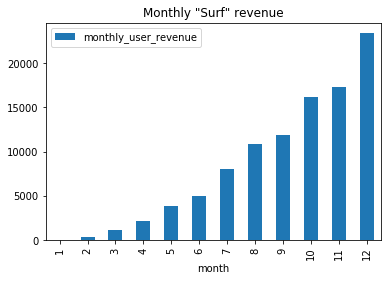

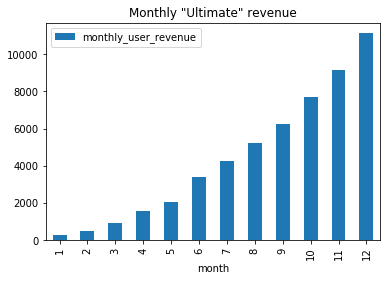

In [31]:
total_revenue_month_plan = df_merged.groupby(['plan','month'])['monthly_user_revenue'].sum().reset_index()
total_revenue_month_plan[total_revenue_month_plan['plan'] == 'surf'].plot(y='monthly_user_revenue', x='month', kind='bar')
plt.title('Monthly "Surf" revenue');

total_revenue_month_plan[total_revenue_month_plan['plan'] == 'ultimate'].plot(y='monthly_user_revenue', x='month', kind='bar')
plt.title('Monthly "Ultimate" revenue');


I plotted bar charts to show monthly totals for each months and plan.

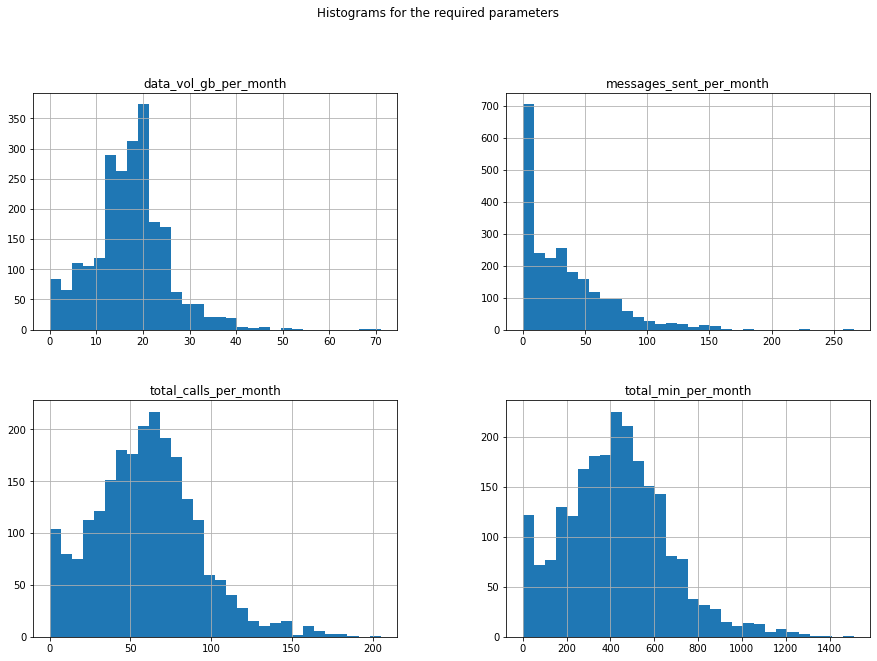

In [32]:
df_merged[['total_min_per_month', 'total_calls_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month']].hist(bins = 30, figsize = (15, 10))
plt.suptitle('Histograms for the required parameters', y = 1);


I plotted histograms for 4 columns: 'total_min_per_month', 'total_calls_per_month', 'messages_sent_per_month' and 'data_vol_gb_per_month'. From the histograms we can see that the distribution is skewed to the right. We need to determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue working with the filtered data.

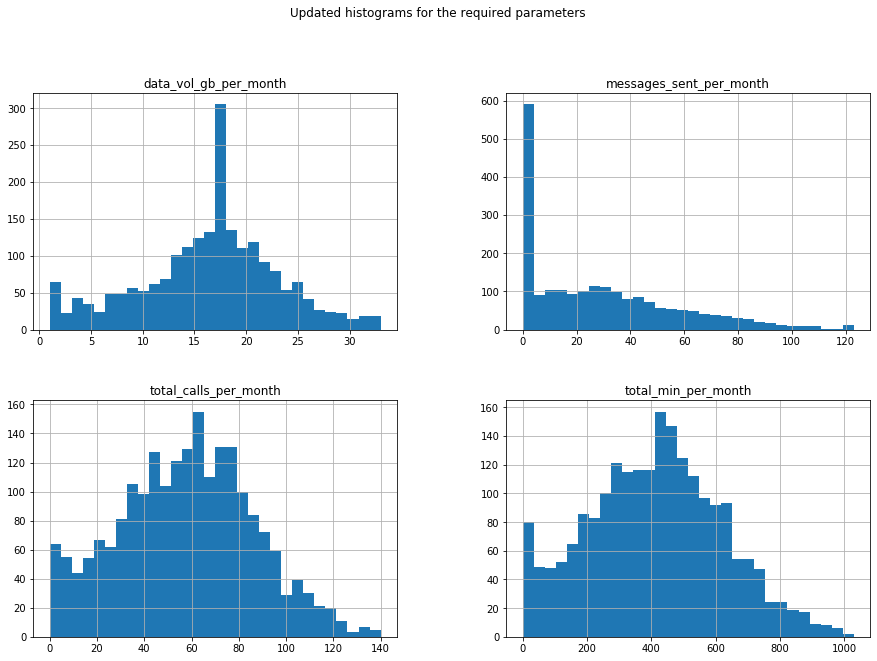

In [33]:
filtered_data = df_merged[['total_min_per_month', 'total_calls_per_month', 'messages_sent_per_month', 'data_vol_gb_per_month']]
Q1 = filtered_data.quantile(0.25)
Q3 = filtered_data.quantile(0.75)
IQR = Q3 - Q1
filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data.hist(bins = 30, figsize = (15, 10))
plt.suptitle('Updated histograms for the required parameters', y = 1);

We can see that the new histograms are not skewed anymore. The mean is now closer do the median, and the data distribution is closer to a normal distribution. Outliers removed successfully. 

In [34]:
filtered_data = df_merged[['total_calls_per_month',  'total_min_per_month', 'messages_sent_per_month', 
                           'data_vol_gb_per_month', 'monthly_user_revenue']]
Q1 = filtered_data.quantile(0.25)
Q3 = filtered_data.quantile(0.75)
IQR = Q3 - Q1
filtered_data = filtered_data[~((filtered_data < (Q1 - 1.5 * IQR)) |(filtered_data > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_data['plan'] = df_merged['plan']
ultimate_df = filtered_data.query("plan == 'ultimate'")[['total_calls_per_month', 
                                                     'total_min_per_month', 'messages_sent_per_month', 
                                                     'data_vol_gb_per_month', 'monthly_user_revenue']]

surf_df = filtered_data.query("plan == 'surf'")[['total_calls_per_month', 
                                                     'total_min_per_month', 'messages_sent_per_month', 
                                                     'data_vol_gb_per_month', 'monthly_user_revenue']]



I separated the filtered dataframe to each plan - "surf" and "ultimate" to be used in the next step. 

**Find the minutes the users of each plan require per month:**

In [35]:
minutes_req = df_merged.groupby('plan')['total_min_per_month'].describe()
minutes_req['var'] = df_merged.groupby('plan')['total_min_per_month'].agg(np.var)
minutes_req

,count,mean,std,min,25%,50%,75%,max,var
plan,,,,,,,,,
surf,1573.0,428.749523,234.453150,0.0,272.0,425.0,576.00,1510.0,54968.279461
ultimate,720.0,430.450000,240.508762,0.0,260.0,424.0,565.25,1369.0,57844.464812


"Ultimate" plan users require on average more minutes per month. 

In [36]:
filtered_data['plan'] = df_merged['plan']
minutes_req_fil = filtered_data.groupby('plan')['total_min_per_month'].describe()
minutes_req_fil['var'] = filtered_data.groupby('plan')['total_min_per_month'].agg(np.var)
minutes_req_fil

,count,mean,std,min,25%,50%,75%,max,var
plan,,,,,,,,,
surf,1376.0,406.082849,210.208562,0.0,257.0,410.0,558.00,1029.0,44187.639677
ultimate,654.0,411.373089,205.253360,0.0,260.5,419.0,541.75,987.0,42128.941756


**Both variance and standard deviation are measure of spread or dispersion around the mean of a data set. We know that 99% of the values are found within three standard deviations of the mean, for example surf minutes: (406-3x210, 406+3x210). Values outside this interval are outliers.**

In [37]:
surf_df.describe()

,total_calls_per_month,total_min_per_month,messages_sent_per_month,data_vol_gb_per_month,monthly_user_revenue
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,56.582849,406.082849,27.145349,15.632994,49.768576
std,28.650376,210.208562,27.036957,6.096178,33.094969
min,0.000000,0.000000,0.000000,1.000000,20.000000
25%,37.000000,257.000000,2.000000,12.000000,20.000000
50%,57.000000,410.000000,21.500000,17.000000,40.000000
75%,77.000000,558.000000,42.000000,20.000000,71.200000
max,140.000000,1029.000000,123.000000,26.000000,136.420000


In [38]:
ultimate_df.describe()

,total_calls_per_month,total_min_per_month,messages_sent_per_month,data_vol_gb_per_month,monthly_user_revenue
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,58.033639,411.373089,32.399083,16.544343,70.256881
std,28.400474,205.253360,29.126614,6.555945,1.996492
min,0.000000,0.000000,0.000000,1.000000,70.000000
25%,36.000000,260.500000,5.000000,13.000000,70.000000
50%,60.000000,419.000000,27.000000,17.000000,70.000000
75%,77.000000,541.750000,54.000000,21.000000,70.000000
max,140.000000,987.000000,123.000000,33.000000,91.000000


"surf" customer averages per month are: 57 calls, 406 total call minutes duration, 27 text messages and 16 GB of data.
"ultimate" customer averages per month are: 58 calls, 411 total call minutes duration, 32 text messages and 17 GB of data.

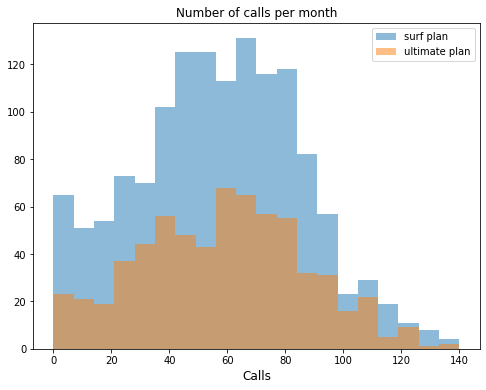

In [39]:
plt.figure(figsize=(8,6))
plt.hist(surf_df['total_calls_per_month'], bins=20, alpha=0.5, label='surf plan')
plt.hist(ultimate_df['total_calls_per_month'], bins=20, alpha=0.5, label='ultimate plan')


plt.xlabel('Calls', size=12)
plt.title('Number of calls per month')
plt.legend(loc='upper right');

From the histogram above, we can compare the number of calls distribution across plans. The customers using surf plan made more calls per month.   

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


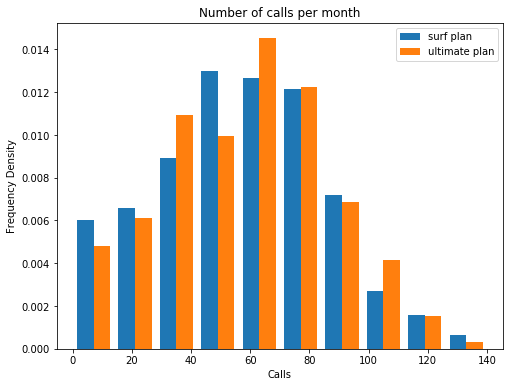

In [40]:
plt.figure(figsize=(8,6))
plt.hist([surf_df['total_calls_per_month'], ultimate_df['total_calls_per_month']],  label= ['surf plan', 'ultimate plan'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Calls')
plt.title('Number of calls per month');

From the histogram above, we can compare the frequency density of number of calls distribution across plans. According to the frequency density the customers using surf plan made more calls per month. 

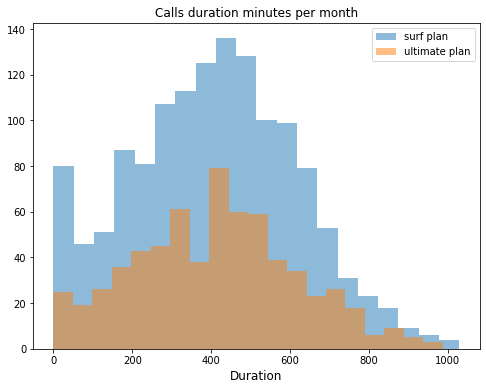

In [41]:
plt.figure(figsize=(8,6))
plt.hist(surf_df['total_min_per_month'], bins=20, alpha=0.5, label='surf plan')
plt.hist(ultimate_df['total_min_per_month'], bins=20, alpha=0.5, label='ultimate plan')


plt.xlabel('Duration', size=12)
plt.title('Calls duration minutes per month')
plt.legend(loc='upper right');

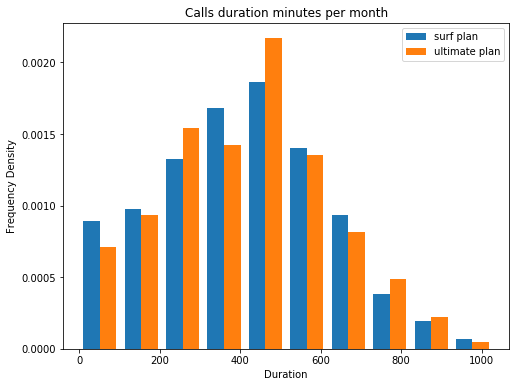

In [42]:
plt.figure(figsize=(8,6))
plt.hist([surf_df['total_min_per_month'], ultimate_df['total_min_per_month']],  label= ['surf plan', 'ultimate plan'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Duration')
plt.title('Calls duration minutes per month');

The customers behavior for both plans follow a similar trend. Both peaks at around 500 minutes. The surf plans customers talked for larger total amount of minutes. There were more surf plan customers that made calls.

**Find the text messages the users of each plan require per month:**

In [43]:
messages_req = df_merged.groupby('plan')['messages_sent_per_month'].describe()
messages_req['var'] = df_merged.groupby('plan')['messages_sent_per_month'].agg(np.var)
messages_req

,count,mean,std,min,25%,50%,75%,max,var
plan,,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0,1126.724522
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0,1208.756744


"Ultimate" plan users require on average more messages per month. 

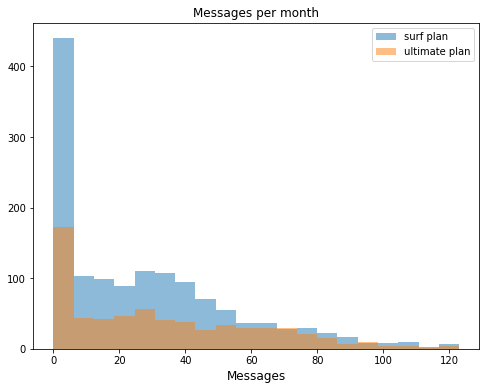

In [44]:
plt.figure(figsize=(8,6))
plt.hist(surf_df['messages_sent_per_month'], bins=20, alpha=0.5, label='surf plan')
plt.hist(ultimate_df['messages_sent_per_month'], bins=20, alpha=0.5, label='ultimate plan')


plt.xlabel('Messages', size=12)
plt.title('Messages per month')
plt.legend(loc='upper right');

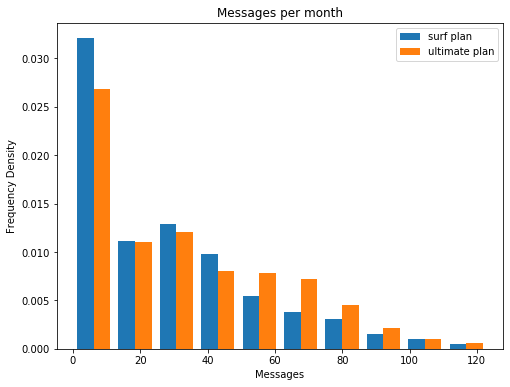

In [45]:
plt.figure(figsize=(8,6))
plt.hist([surf_df['messages_sent_per_month'], ultimate_df['messages_sent_per_month']],  label= ['surf plan', 'ultimate plan'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Messages')
plt.title('Messages per month');

The customers behavior for both plans follow a similar trend. Most customers of both plans aren't texting a lot. The surf plans customers sent more messages on total. There were more surf plan customers that sent messages.

**Find the volume of data the users of each plan require per month:**

In [46]:
data_req = df_merged.groupby('plan')['data_vol_gb_per_month'].describe()
data_req['var'] = df_merged.groupby('plan')['data_vol_gb_per_month'].agg(np.var)
data_req

,count,mean,std,min,25%,50%,75%,max,var
plan,,,,,,,,,
surf,1573.0,17.037508,8.016395,0.0,12.0,17.0,21.0,71.0,64.262587
ultimate,720.0,17.719444,7.865289,0.0,13.0,17.0,22.0,47.0,61.862765


"Ultimate" plan users require on average more data per month. 

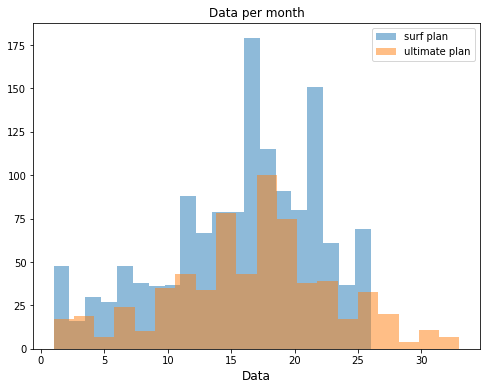

In [47]:
plt.figure(figsize=(8,6))
plt.hist(surf_df['data_vol_gb_per_month'], bins=20, alpha=0.5, label='surf plan')
plt.hist(ultimate_df['data_vol_gb_per_month'], bins=20, alpha=0.5, label='ultimate plan')


plt.xlabel('Data', size=12)
plt.title('Data per month')
plt.legend(loc='upper right');

**The histogram shows that the surf plan had more users that actively consumed data. Both plans peak is around the same number of GB required - 17 GB, and the overall amounts for both plans follow a similar trend. There are ultimate plan users that required large amount of data - more than 25 GB, which is a rare occurrence among the surf plan users.**

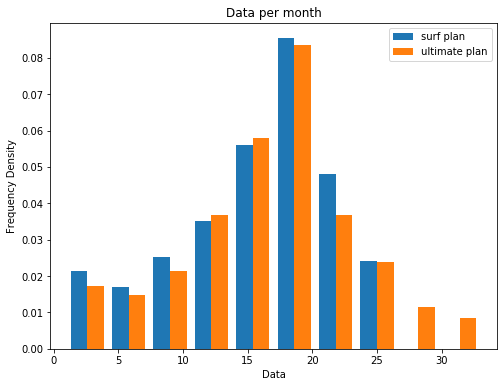

In [48]:
plt.figure(figsize=(8,6))
plt.hist([surf_df['data_vol_gb_per_month'], ultimate_df['data_vol_gb_per_month']],  label= ['surf plan', 'ultimate plan'], density = True)
plt.legend()
plt.ylabel('Frequency Density')
plt.xlabel('Data')
plt.title('Data per month');

The customers behavior for both plans follow a similar trend. Both peaks at around 18 GB of data. The surf plans customers used more data in total. There were more surf plan customers that used data.

### Conclusion

In this part I carried out Exploratory Data Analysis and described the customers behavior and compared both plans. 

"surf" customer averages per month are: 57 calls, 406 total call minutes duration, 27 text messages and 16 GB of data. "ultimate" customer averages per month are: 58 calls, 411 total call minutes duration, 32 text messages and 17 GB of data.

* Starting March 2018, "surf" plan generated more monthly revenue compared to "ultimate".
* Both plans monthly revenues increased with every month. 

I plotted distribution and frequency density histograms both for both plans:

* Large amount of "surf" customers exceed their plan limits, which result in additional revenues. On the other hand, "ultimate" customers rarely exceed their plan limits, resulting in less amount of customers that generate additional revenue.
* In general, customers of both plans usage pattern is very similar. Again, because of that, the "surf" customers generate additional revenue for exceeding their limits.
* On average, "ultimate" customer generate more revenue per month compared to "surf" customer. But in total, "surf" customers generate more revenue.

### 4. Test the hypotheses

**Hypothesis test 1**

* H0 (null hypothesis): average revenue per month for ultimate users equals average revenue per month for surf users
* H1 (alternative hypothesis): average revenue per month for ultimate users does not equal average revenue per month for surf users

In [49]:
print('Average revenue: surf = {}, ultimate = {}'.format(round(np.mean(surf_df["monthly_user_revenue"]),0)
                                                         ,round(np.mean(ultimate_df["monthly_user_revenue"]),0)))

Average revenue: surf = 50.0, ultimate = 70.0


We use a significance level of 0.05. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

In [50]:
ultimate = ultimate_df['monthly_user_revenue']
surf = surf_df['monthly_user_revenue']

alpha = 0.05

results = st.ttest_ind(ultimate, surf, equal_var = False)
print('The p-value is:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 1.2566702157211913e-98
We reject the null hypohesis


**We reject the null hypothesis. Our analysis suggest that average revenue from users of Ultimate and Surf calling plans differs.**

**Hypothesis test 2**

* H0 (null hypothesis): average revenue for users in NY-NJ areas equals average revenue for users from other regions
* H1 (alternative hypothesis): average revenue for users in NY-NJ areas does not equal average revenue for users from other regions

In [51]:
nynj = df_merged.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_user_revenue']
not_nynj = df_merged.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['monthly_user_revenue'] 
print('Average revenue: NY-NJ = {}, Not NY-NJ = {}'.format(round(np.mean(nynj),0)
                                                         ,round(np.mean(not_nynj),0)))

Average revenue: NY-NJ = 63.0, Not NY-NJ = 67.0


 We use a significance level (or alpha) of 0.05. We use a t-test to test the hypothesis because it is used to compare the means of two groups in order to determine whether two groups are different from one another.

In [52]:
alpha = 0.05
results = st.ttest_ind(nynj, not_nynj, equal_var = False)
print('The p-value is:',results.pvalue)

if (results.pvalue < alpha):
    print('We reject the null hypohesis')
else:
    print('We fail to reject the null hypothesis')

The p-value is: 0.08381531697981721
We fail to reject the null hypothesis


**We fail to reject the null hypothesis. Our analysis suggest that average revenue for users in NY-NJ areas does not differ from that of the users from other regions.**

### 5. Overall conclusion

**The main goal was to analyze behavior of 500 Megaline customers from 2018 and determine which plan brings more revenue.**
First of all, I opened the files and studied the general information. 
Next step was to **prepare the data and make necessary calculations** so I could analyze it:
* Converted data types of date columns to datetype. 
* Separated user_id and call/message/session id. 
* Filled the missing values of active plan users in the 'churn_date' with 2018-12-31.
* Made sure there are no duplicate rows or date mismatches in any of the dataframes. 
* I calculated the number of calls made and minutes used per month, the number of text messages sent per month, the volume of data per month and added merged all to one dataframe. 
* Calculated the monthly revenue from each user.

Then I carried out **Exploratory Data Analysis and described the customers behavior** and compared both plans: 

* "surf" customer averages per month are: 57 calls, 406 total call minutes duration, 27 text messages and 16 GB of data. 
* "ultimate" customer averages per month are: 58 calls, 411 total call minutes duration, 32 text messages and 17 GB of data.

I found that:

* Starting March 2018, "surf" plan generated more monthly revenue compared to "ultimate".
* Both plans monthly revenues increased with every month. 
* Large amount of "surf" customers exceed their plan limits, which result in additional revenues. On the other hand, "ultimate" customers rarely exceed their plan limits, resulting in less amount of customers that generate additional revenue.
* In general, customers of both plans usage pattern is very similar. Again, because of that, the "surf" customers generate additional revenue for exceeding their limits.
* On average, "ultimate" customer generate more revenue per month compared to "surf" customer. But in total, "surf" customers generate more revenue.

I **tested the hypotheses** and found:
* The average revenue from users of Ultimate and Surf calling plans differs.
* The average revenue for users in NY-NJ areas does not differ from that of the users from other regions.


**My advice to the commercial department of Megaline is to adjust the advertising budget in favor of the "surf" plan.**

